# Numerical Methods Project

### Given:
- Insulated Rod around circumference
- x = 0 and x = L not insulated
- Rod is initially at Ti and in equilibrium with its surroundings

---

1. At time t = 0, surface temp of ends reaches 0 deg C
2. For t>0, temp distribution in the rod changes with time and approaches steady state
3. T(x,t) is to be determined numerically
4. Determine the internal energy of the rod as a function of time

---

### Properties:
- rho = 1000 kg/m^3
- k = 500 W/mK
- c = 500 J/kgK
- L = 1 m
- A = .001 m^2
- To = Tl = 273.15 K
- Ti = 300 K

In [56]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter

class heatedRod():
    
    def __init__(self, l, initT, rho, c, a, k):
        self.l = l
        self.Ti = initT
        self.rho = rho
        self.c = c
        self.a = a
        self.k = k
        self.alpha = k/(rho*c)
        
    def tempMap(self, n, dt, nt):
        self.n = n
        self.time = (int)(dt*nt)
        print(self.time)
        dx = self.l/n
        E = np.zeros((self.time, 1))
        T = np.zeros((n, self.time))
        T[1:n-1 ,0] = self.Ti
        T[0,:] = 273.15
        T[n-1,:] = 273.15

        
        #loop over time 
        for t in range(0, self.time):
            #loop over space (length)
            for i in range(1, n):
                
                if i < n-1 and t < self.time-1:
                    # calc second deriv using 3pt central diff, euler explicit method
                    T[i, t+1] = T[i, t] + (self.alpha*dt/(dx**2))*(T[i-1, t] - 2*T[i, t] + T[i+1, t])
                
                # calc E from trapezoidal rule
                E[t] += (T[i-1, t] + T[i, t])*dx/2

                
        # mult internal energy inegration by rho,c,a to get actual internal energy
        E = E * (self.rho * self.c * self.a)
        
        # return the temperature matrix and the energy vector
        return T, E
    
    def surfPlot(self):
        fig = plt.figure()
        ax = fig.gca(projection='3d')

        # Make data.
        X = np.arange(0, self.time, 1)
        Y = np.arange(0, self.n, 1)
        X, Y = np.meshgrid(X, Y)

        # Plot the surface.
        surf = ax.plot_surface(X, Y, T, cmap=cm.coolwarm,
                               linewidth=0, antialiased=False)

        # Customize the z axis.
        # ax.set_zlim(-1.01, 1.01)
        # ax.zaxis.set_major_locator(LinearLocator(10))
        # ax.zaxis.set_major_formatter(FormatStrFormatter('%.02f'))

        # Add a color bar which maps values to colors.
        fig.colorbar(surf, shrink=0.5, aspect=5)

        plt.show()
            
        
    

In [57]:
rod = heatedRod(1, 300, 1000, 500, .001, 500)
T, E = rod.tempMap(41,.01,5000)
print(T)
print(E)
plt.plot(T)
plt.show()

50
[[ 273.15        273.15        273.15       ...,  273.15        273.15
   273.15      ]
 [ 300.          299.5486515   299.11247734 ...,  288.52687852
   288.40373538  288.28321029]
 [ 300.          300.          299.99241283 ...,  296.57816851
   296.48762602  296.39748146]
 ..., 
 [ 300.          300.          299.99241283 ...,  296.57816851
   296.48762602  296.39748146]
 [ 300.          299.5486515   299.11247734 ...,  288.52687852
   288.40373538  288.28321029]
 [ 273.15        273.15        273.15       ...,  273.15        273.15
   273.15      ]]
[[ 146014.02439024]
 [ 146003.01589024]
 [ 145992.19244313]
 [ 145981.54782742]
 [ 145971.0760831 ]
 [ 145960.7714993 ]
 [ 145950.62860261]
 [ 145940.64214599]
 [ 145930.80709825]
 [ 145921.11863399]
 [ 145911.5721241 ]
 [ 145902.16312675]
 [ 145892.88737877]
 [ 145883.7407875 ]
 [ 145874.71942301]
 [ 145865.81951073]
 [ 145857.03742444]
 [ 145848.36967957]
 [ 145839.81292688]
 [ 145831.36394641]
 [ 145823.01964174]
 [ 145814.7770344

TypeError: plot() missing 1 required positional argument: 'ys'

In [58]:
plt.plot(E)
plt.show()

TypeError: plot() missing 1 required positional argument: 'ys'

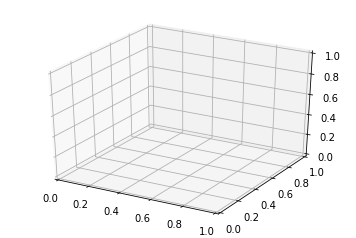

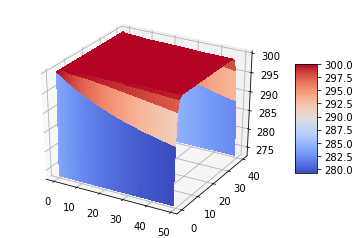

In [59]:
rod.surfPlot()